In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

d:\softwares\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import random
import pandas as pd
import requests

def sample_books(book_urls, Author_name,book_name):
    # Create a list to store the DataFrames
    dataframes = []
    # Iterate over the book URLs and labels
    for url, label, title in zip(book_urls, Author_name,book_name):
        # Download book from Gutenberg
        book = requests.get(url)
        book = book.text
        # Split book into a list of words
        words = book.split()
        # Create a list to store the partitions
        partitions = []
        # Use a for loop to sample 200 partitions of 100 words each
        for i in range(200):
            start_index = random.randint(0, len(words) - 100)
            partition = words[start_index : start_index + 100]
            partitions.append(" ".join(partition))
        # Create a Pandas DataFrame to store the partitions
        data = {'text': partitions,'author': [label]*200,'book':title}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        dataframes.append(df)
    # Concatenate the DataFrames into a single DataFrame
    final_df = pd.concat(dataframes)
    #return dataframe
    return final_df


In [3]:
#Example usage
book_urls = ['http://www.gutenberg.org/files/1342/1342-0.txt', 'http://www.gutenberg.org/files/84/84-0.txt','https://www.gutenberg.org/files/2701/2701-0.txt','https://www.gutenberg.org/files/1228/1228-0.txt','https://www.gutenberg.org/files/2600/2600-0.txt']
Author_name = ['Jane Austen', 'Mary Wollstonecraft Shelley','Herman Melville', 'Charles Darwin','Leo Tolstoy']
book_name = ['Pride and prejudice', 'Frankenstein','Moby-Dick','The Origin of Species','War and Peace']
df = sample_books(book_urls, Author_name,book_name)

In [5]:
df.to_csv('text_data.csv',index=False)

In [6]:
# Load the data into a pandas dataframe
df = pd.read_csv("text_data.csv")

In [7]:
# Preprocess the data
df['text'] = df['text'].str.lower() # Convert to lowercase
df['text'] = df['text'].str.replace('[^\w\s]','') # Remove punctuation

<ipython-input-7-310b42ec99db>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','') # Remove punctuation


In [8]:
# Split the data into training, validation, and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

In [9]:
# Transform the data into bag-of-words representation
vectorizer = CountVectorizer()
train_matrix = vectorizer.fit_transform(train_df['text'])
val_matrix = vectorizer.transform(val_df['text'])
test_matrix = vectorizer.transform(test_df['text'])

## BaseLine Classifiers

In [10]:
# Train a Naive Bayes classifier
Model_MultinomialNB = MultinomialNB()
Model_MultinomialNB.fit(train_matrix, train_df['author'])

MultinomialNB()

In [ ]:
# Train a SVM
SVM_

In [11]:
# Evaluate the model using 10-fold cross-validation
val_predictions_MultinomialNB = Model_MultinomialNB.predict(val_matrix)
val_accuracy_MultinomialNB = accuracy_score(val_df['author'], val_predictions_MultinomialNB)
print("Validation Accuracy:", val_accuracy_MultinomialNB)

Validation Accuracy: 0.94


In [12]:
# Evaluate the model on the testing set
test_predictions_MultinomialNB = Model_MultinomialNB.predict(test_matrix)
test_accuracy_MultinomialNB = accuracy_score(test_df['author'], test_predictions_MultinomialNB)
print("Testing Accuracy:", test_accuracy_MultinomialNB)

Testing Accuracy: 0.95


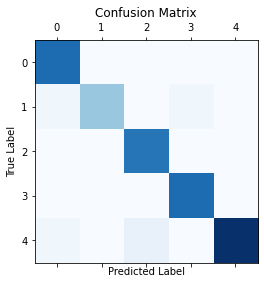

In [13]:
# Plot the confusion matrix
cm = confusion_matrix(test_df['author'], test_predictions_MultinomialNB)
plt.matshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()